In [31]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [32]:
class AgentState(TypedDict):
    name : str
    guesses: List[int]
    attempts : int
    lowerBound : int
    upperBound : int
    secret : int
    res : str
    route : str

def setup_node(state: AgentState) -> AgentState:
    state["name"] = f"Hey {state['name']}, welcome to higher or lower"
    state["secret"] = 19
    state["guesses"] = []
    state["res"] = ""
    state["route"] = "continue_edge"
    # attempts/lowerBound/upperBound can be passed in invoke
    return state


def guess_node(state : AgentState) -> AgentState:
    state["guesses"].append(random.randint(state["lowerBound"], state["upperBound"]))
    state["attempts"] += 1

    recent = state["guesses"][-1]

    if recent == state["secret"]:
        state["res"] = f"Congratulations you guessed right! (ans : {state['secret']})"
        state["route"] = "exit_edge"
    elif state["attempts"] > 7:
        state["res"] = f"Sorry you ran out of attempts :("
        state["route"] = "exit_edge"
    else:
        if state["secret"] > recent:
            state["lowerBound"] = recent + 1
        else:
            state["upperBound"] = recent - 1
        state["route"] = "continue_edge"

    return state

def hint_node(state : AgentState) -> str:
    return state["route"]


In [33]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_conditional_edges(
    "guess",
    hint_node,
    {
        "exit_edge" : END,
        "continue_edge" : "guess"
    }
)

app = graph.compile()

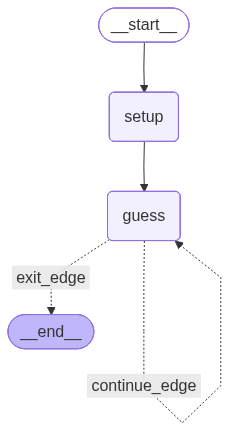

In [34]:
app

In [35]:
app.invoke({"name" : "Sudeep", "attempts" : 0, "lowerBound" : 0, "upperBound": 20})

{'name': 'Hey Sudeep, welcome to higher or lower',
 'guesses': [3, 20, 4, 10, 13, 17, 19],
 'attempts': 7,
 'lowerBound': 18,
 'upperBound': 19,
 'secret': 19,
 'res': 'Congratulations you guessed right! (ans : 19)',
 'route': 'exit_edge'}